In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primeira parte

In [ ]:
with open('/content/X_train.txt', 'r') as file:
    x_train_lines = file.readlines()

with open('/content/y_train.txt', 'r') as file:
    y_train_data = file.read().split('\n')

# Remover linhas vazias, se houver
x_train_lines = [line.strip() for line in x_train_lines if line.strip()]
y_train_data = [y for y in y_train_data if y.strip()]

# Dividir cada linha em valores usando espaço como delimitador
x_train_data = [line.split() for line in x_train_lines]

# Criar DataFrame
df_train = pd.DataFrame(x_train_data)

# Adicionar a coluna de rótulos (y_train) ao DataFrame
df_train['Y'] = y_train_data

# Separar X e Y
X_train = df_train.drop('Y', axis=1).astype(float)  # Remove a coluna de rótulos para obter os recursos
y_train = df_train['Y'].astype(int)   # Apenas a coluna de rótulos

In [ ]:
with open('/content/X_test.txt', 'r') as file:
    x_test_lines = file.readlines()

with open('/content/y_test.txt', 'r') as file:
    y_test_data = file.read().split('\n')

# Remover linhas vazias, se houver
x_test_lines = [line.strip() for line in x_test_lines if line.strip()]
y_test_data = [y for y in y_test_data if y.strip()]

# Dividir cada linha em valores usando espaço como delimitador
x_test_data = [line.split() for line in x_test_lines]

# Criar DataFrame
df_test = pd.DataFrame(x_test_data)

# Adicionar a coluna de rótulos (y_test) ao DataFrame
df_test['Y'] = y_test_data

# Separar X e Y
X_test = df_test.drop('Y', axis=1).astype(float)  # Remove a coluna de rótulos para obter os recursos
y_test = df_test['Y'].astype(int)  # Apenas a coluna de rótulos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
import seaborn as sns

# a)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.9579233118425518


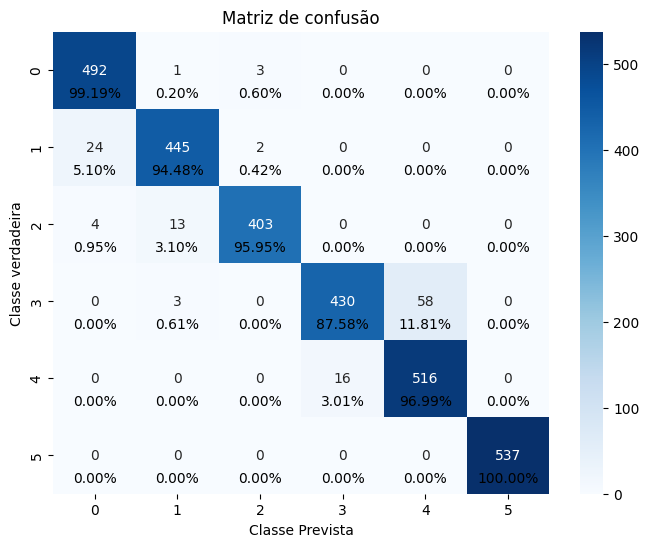

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.tight_layout()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Adiciona as porcentagens na matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.8, "{:.2%}".format(conf_matrix_percent[i, j]),
                 ha='center', va='center', color='black')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de confusão')
plt.savefig('1a.png', bbox_inches='tight')

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
#balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
#print("Acurácia balanceada:", balanced_accuracy)

# b)

Melhor valor de k considerando Acurácia: 16
Acurácia: 0.9060061079063454


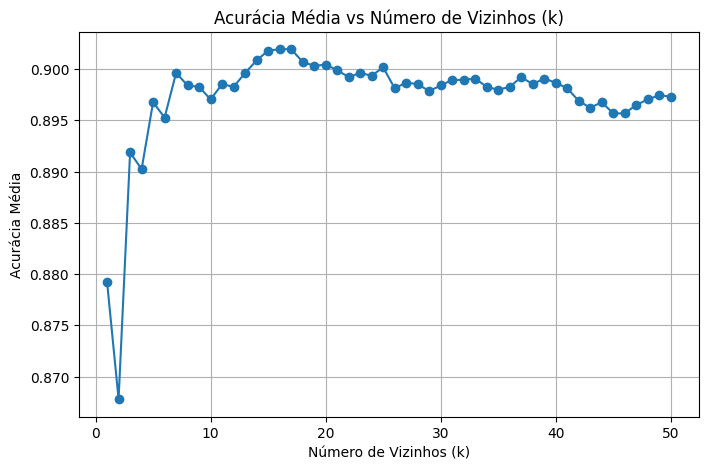

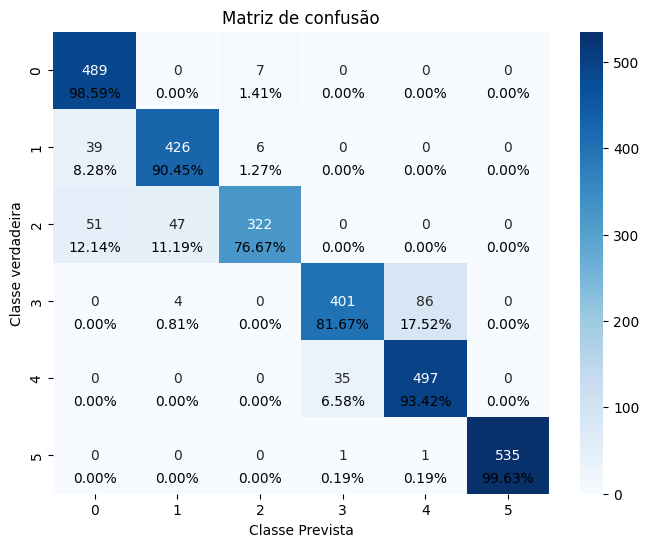

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Lista para armazenar as acurácias
accuracies = []
#balanced_accuracies = []

# Testar cada valor de k de 1 a 20
for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

    #scores_b = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')
    #balanced_accuracies.append(scores_b.mean())

# Plotar a acurácia em relação a k
plt.figure(figsize=(8, 5),facecolor='white')
plt.tight_layout()
#plt.subplot(1,2,1)
plt.plot(range(1, 51), accuracies, marker='o')
#plt.xticks(range(1, 51, 1))
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média vs Número de Vizinhos (k)')
plt.grid(True)
plt.savefig('1b.png', bbox_inches='tight')
# plt.subplot(1,2,2)
# plt.plot(range(1, 21), balanced_accuracies, marker='o')
# plt.xticks(range(1, 21, 1))
# plt.xlabel('Número de Vizinhos (k)')
# plt.ylabel('Acurácia Balanceada Média')
# plt.title('Acurácia Balanceada Média vs Número de Vizinhos (k)')
# plt.grid(True)

# Encontrar o melhor valor de k
best_k_a = np.argmax(accuracies) + 1
print("Melhor valor de k considerando Acurácia:", best_k_a)

# best_k_b = np.argmax(balanced_accuracies) + 1
# print("Melhor valor de k considerando Acurácia balanceada:", best_k_b)

# Treinar o modelo final com o melhor valor de k
best_model_a = KNeighborsClassifier(n_neighbors=best_k_a)
best_model_a.fit(X_train, y_train)

# best_model_b = KNeighborsClassifier(n_neighbors=best_k_b)
# best_model_b.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred_a = best_model_a.predict(X_test)
#y_pred_b = best_model_b.predict(X_test)

# Calcular a matriz de confusão
conf_matrix_a = confusion_matrix(y_test, y_pred_a)
#conf_matrix_b = confusion_matrix(y_test, y_pred_b)
conf_matrix_percent = conf_matrix_a / conf_matrix_a.sum(axis=1)[:, np.newaxis]

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.tight_layout()
#plt.subplot(1,2,1)
sns.heatmap(conf_matrix_a, annot=True, fmt="d", cmap="Blues")

# Adiciona as porcentagens na matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.8, "{:.2%}".format(conf_matrix_percent[i, j]),
                 ha='center', va='center', color='black')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de confusão')
plt.savefig('c1b.png', bbox_inches='tight')
# plt.subplot(1,2,2)
# sns.heatmap(conf_matrix_b, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Classe Predita')
# plt.ylabel('Classe verdadeira')
# plt.title('Matriz de confusão com o melhor k para acurácia')
# plt.show()

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred_a)
print("Acurácia:", accuracy)
# balanced_accuracy = balanced_accuracy_score(y_test, y_pred_b)
# print("Acurácia balanceada:", balanced_accuracy)

# Segunda parte

In [ ]:
file_paths = [
    '/content/Inertial_train/body_acc_x_train.txt',
    '/content/Inertial_train/body_acc_y_train.txt',
    '/content/Inertial_train/body_acc_z_train.txt',
    '/content/Inertial_train/body_gyro_x_train.txt',
    '/content/Inertial_train/body_gyro_y_train.txt',
    '/content/Inertial_train/body_gyro_z_train.txt'
]

# Lista para armazenar os DataFrames de cada arquivo
dfs = []

# Loop sobre os arquivos e criar DataFrames
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    lines = [line.strip().split() for line in lines if line.strip()]
    df = pd.DataFrame(lines)
    dfs.append(df)

# Concatenar todos os DataFrames ao longo do eixo das colunas
df_train2 = pd.concat(dfs, axis=1)

# Ler os rótulos y_train
with open('/content/y_train.txt', 'r') as file:
    y_train2_data = file.read().split('\n')
y_train2_data = [int(y) for y in y_train2_data if y.strip()]

# Adicionar a coluna de rótulos (y_train) ao DataFrame
df_train2['Y'] = y_train2_data

# Separar X e Y
X_train2 = df_train2.drop('Y', axis=1).astype(float)  # Remove a coluna de rótulos para obter os recursos
y_train2 = df_train2['Y'].astype(int)   # Apenas a coluna de rótulos

In [ ]:
file_paths = [
    '/content/Inertial_test/body_acc_x_test.txt',
    '/content/Inertial_test/body_acc_y_test.txt',
    '/content/Inertial_test/body_acc_z_test.txt',
    '/content/Inertial_test/body_gyro_x_test.txt',
    '/content/Inertial_test/body_gyro_y_test.txt',
    '/content/Inertial_test/body_gyro_z_test.txt'
]

# Lista para armazenar os DataFrames de cada arquivo
dfs = []

# Loop sobre os arquivos e criar DataFrames
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    lines = [line.strip().split() for line in lines if line.strip()]
    df = pd.DataFrame(lines)
    dfs.append(df)

# Concatenar todos os DataFrames ao longo do eixo das colunas
df_test2 = pd.concat(dfs, axis=1)

# Ler os rótulos y_test
with open('/content/y_test.txt', 'r') as file:
    y_test2_data = file.read().split('\n')
y_test2_data = [int(y) for y in y_test2_data if y.strip()]

# Adicionar a coluna de rótulos (y_test) ao DataFrame
df_test2['Y'] = y_test2_data

# Separar X e Y
X_test2 = df_test2.drop('Y', axis=1).astype(float)  # Remove a coluna de rótulos para obter os recursos
y_test2 = df_test2['Y'].astype(int)   # Apenas a coluna de rótulos


# a)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.3213437393959959


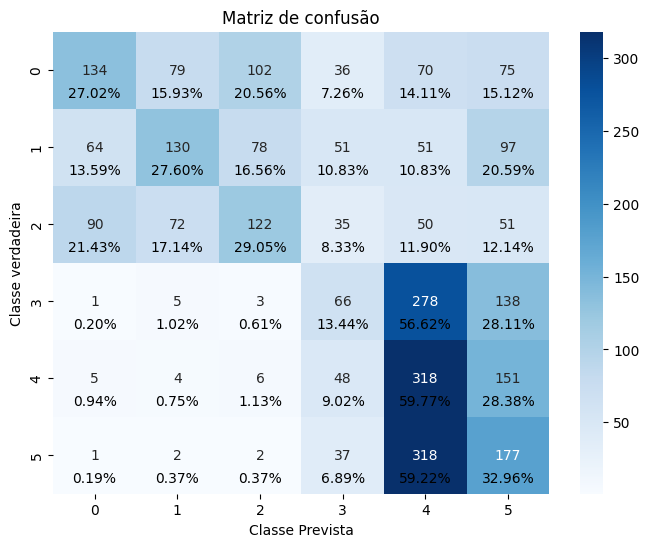

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train2, y_train2)

# Fazer previsões no conjunto de teste
y_pred2 = model.predict(X_test2)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test2, y_pred2)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.tight_layout()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Adiciona as porcentagens na matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.8, "{:.2%}".format(conf_matrix_percent[i, j]),
                 ha='center', va='center', color='black')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de confusão')
plt.savefig('2a.png', bbox_inches='tight')

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test2, y_pred2)
#balanced_accuracy = balanced_accuracy_score(y_test2, y_pred2)
print("Acurácia:", accuracy)
#print("Acurácia balanceada:", balanced_accuracy)

# b)

Melhor valor de k considerando Acurácia: 2
Acurácia: 0.6287750254496097


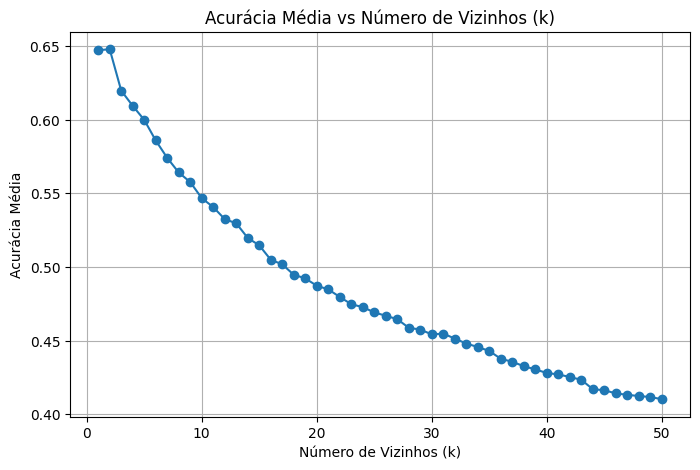

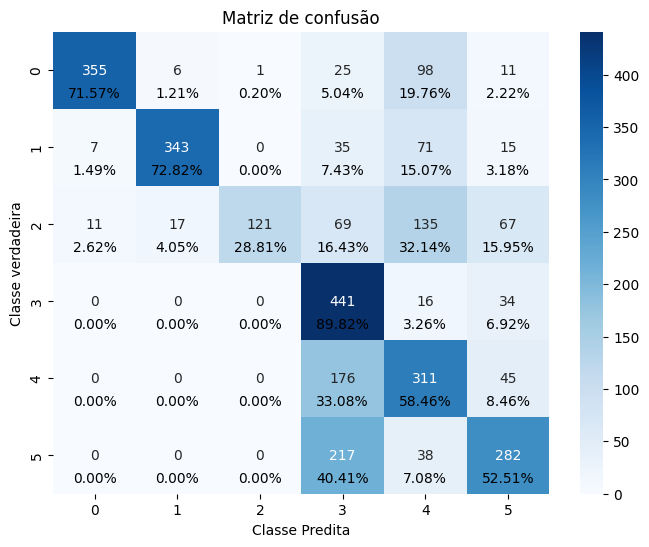

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Lista para armazenar as acurácias
accuracies = []
#balanced_accuracies = []

# Testar cada valor de k de 1 a 20
for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train2, y_train2, cv=5,scoring='accuracy')
    accuracies.append(scores.mean())

    # scores_b = cross_val_score(model, X_train2, y_train2, cv=5, scoring='f1_weighted')
    # balanced_accuracies.append(scores_b.mean())

# Plotar a acurácia em relação a k
plt.figure(figsize=(8, 5),facecolor='white')
plt.tight_layout()
#plt.subplot(1,2,1)
plt.plot(range(1, 51), accuracies, marker='o')
#plt.xticks(range(1, 21, 1))
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média vs Número de Vizinhos (k)')
plt.grid(True)
plt.savefig('2b.png', bbox_inches='tight')
# plt.subplot(1,2,2)
# plt.plot(range(1, 21), balanced_accuracies, marker='o')
# plt.xticks(range(1, 21, 1))
# plt.xlabel('Número de Vizinhos (k)')
# plt.ylabel('Acurácia Balanceada Média')
# plt.title('Acurácia Balanceada Média vs Número de Vizinhos (k)')
# plt.grid(True)

# Encontrar o melhor valor de k
best_k = np.argmax(accuracies) + 1
print("Melhor valor de k considerando Acurácia:", best_k)
# best_k_b = np.argmax(balanced_accuracies) + 1
# print("Melhor valor de k considerando Acurácia balanceada:", best_k_b)

# Treinar o modelo final com o melhor valor de k
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train2, y_train2)

# best_model_b = KNeighborsClassifier(n_neighbors=best_k_b)
# best_model_b.fit(X_train2, y_train2)

# Fazer previsões nos dados de teste
y_pred2 = best_model.predict(X_test2)
# y_pred_b = best_model_b.predict(X_test2)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test2, y_pred2)
#conf_matrix_b = confusion_matrix(y_test2, y_pred_b)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6),facecolor='white')
plt.tight_layout()
#plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# Adiciona as porcentagens na matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.8, "{:.2%}".format(conf_matrix_percent[i, j]),
                 ha='center', va='center', color='black')
plt.xlabel('Classe Predita')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de confusão')
plt.savefig('c2b.png', bbox_inches='tight')

# plt.subplot(1,2,2)
# sns.heatmap(conf_matrix_b, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Classe Predita')
# plt.ylabel('Classe verdadeira')
# plt.title('Matriz de confusão com o melhor k para acurácia')

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test2, y_pred2)
print("Acurácia:", accuracy)
# balanced_accuracy = balanced_accuracy_score(y_test2, y_pred_b)
# print("Acurácia balanceada:", balanced_accuracy)

In [ ]:
y_train.value_counts()

Y
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64